# PSM on GI Bleed Cohort

## Imports

In [124]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd

## Functions

In [125]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)

## Data Prep

In [126]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/albumin_cleaned_for_psm_sg1_nobl.csv')

In [127]:
df.shape

(30208, 14)

In [128]:
df.albumin_24hrs.value_counts()

0.0    29130
1.0     1078
Name: albumin_24hrs, dtype: int64

In [129]:
#df.drop(columns = ['bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [130]:
df.head()

personid                           encounterid  \
0  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
1  511e7212-cb6a-4a04-9d88-7f9fc66014d8  33d6de89-6899-4fd5-887c-32f8dfe134a7   
2  54edb744-256a-47c1-8681-3b8126c5959b  ab30dd8b-1467-4f5a-923e-d73454b24b4a   
3  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
4  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   

   albumin_24hrs  Cirrhosis  anemia_status  30_day_mortality  ICU  \
0            1.0          0            3.0                 0    0   
1            1.0          0            3.0                 0    0   
2            0.0          0            3.0                 0    1   
3            1.0          0            3.0                 0    0   
4            0.0          0            3.0                 0    0   

   mass_transfusion  total_transfusions  CCI  qSOFA  beta_blocker  \
0                 0                   1    6      0             1   
1                 0                   0    2      0             1   
2                 0                   2    7      0             0   
3                 0                   1    4      1             0   
4                 0                   0    1      1             0   

   hemorrhagic  SAPS  
0            0    29  
1            0    22  
2            1    18  
3            0    17  
4            0    12

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30208 entries, 0 to 30207
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   personid            30208 non-null  object 
 1   encounterid         30208 non-null  object 
 2   albumin_24hrs       30208 non-null  float64
 3   Cirrhosis           30208 non-null  int64  
 4   anemia_status       30208 non-null  float64
 5   30_day_mortality    30208 non-null  int64  
 6   ICU                 30208 non-null  int64  
 7   mass_transfusion    30208 non-null  int64  
 8   total_transfusions  30208 non-null  int64  
 9   CCI                 30208 non-null  int64  
 10  qSOFA               30208 non-null  int64  
 11  beta_blocker        30208 non-null  int64  
 12  hemorrhagic         30208 non-null  int64  
 13  SAPS                30208 non-null  int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 3.2+ MB


## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [132]:
am = df[df['albumin_24hrs'] == 1]['30_day_mortality'].value_counts()
print(am)

0    912
1    166
Name: 30_day_mortality, dtype: int64


In [133]:
mrate(am)

30 Day Mortality Rate (pct): 15.398886827458256


In [134]:
nam = df[df['albumin_24hrs'] == 0]['30_day_mortality'].value_counts()
print(nam)

0    27697
1     1433
Name: 30_day_mortality, dtype: int64


In [135]:
mrate(nam)

30 Day Mortality Rate (pct): 4.919327154136629


In [136]:
df_a24 = df[['personid', 'encounterid', '30_day_mortality']]

In [137]:
df_a24.head()

personid                           encounterid  \
0  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
1  511e7212-cb6a-4a04-9d88-7f9fc66014d8  33d6de89-6899-4fd5-887c-32f8dfe134a7   
2  54edb744-256a-47c1-8681-3b8126c5959b  ab30dd8b-1467-4f5a-923e-d73454b24b4a   
3  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
4  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   

   30_day_mortality  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [138]:
#df.drop(columns=['personid', 'encounterid', 'albumin_24'], inplace=True)

In [139]:
df.shape

(30208, 14)

In [140]:
df.head()

personid                           encounterid  \
0  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
1  511e7212-cb6a-4a04-9d88-7f9fc66014d8  33d6de89-6899-4fd5-887c-32f8dfe134a7   
2  54edb744-256a-47c1-8681-3b8126c5959b  ab30dd8b-1467-4f5a-923e-d73454b24b4a   
3  561afc23-43fa-4108-8d23-01cd03d0001f  b0f0d40d-6270-4c3e-a68e-ab460b6fc519   
4  96c2912b-6b71-43ca-9eb4-edf5b128c4b6  94ca7573-09d1-4345-84be-1ed95ce64e5b   

   albumin_24hrs  Cirrhosis  anemia_status  30_day_mortality  ICU  \
0            1.0          0            3.0                 0    0   
1            1.0          0            3.0                 0    0   
2            0.0          0            3.0                 0    1   
3            1.0          0            3.0                 0    0   
4            0.0          0            3.0                 0    0   

   mass_transfusion  total_transfusions  CCI  qSOFA  beta_blocker  \
0                 0                   1    6      0             1   
1                 0                   0    2      0             1   
2                 0                   2    7      0             0   
3                 0                   1    4      1             0   
4                 0                   0    1      1             0   

   hemorrhagic  SAPS  
0            0    29  
1            0    22  
2            1    18  
3            0    17  
4            0    12

## Initialize PsmPy Class

In [141]:
psm = PsmPy(df, treatment= 'albumin_24hrs', indx='encounterid', exclude = ['personid', '30_day_mortality'])

In [142]:
%%time
psm.logistic_ps(balance = True)

Wall time: 7.18 s


In [143]:
df_psm = psm.predicted_data

In [144]:
df_psm.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  eef69bb8-c0a3-425d-b016-7df3a2903ed5          0            3.0    0   
1  33d6de89-6899-4fd5-887c-32f8dfe134a7          0            3.0    0   
2  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
3  96634105-8dd2-4024-84bd-864fe87f4843          0            3.0    0   
4  5f0dcf58-6c2c-45d5-a520-e2ffed4e1772          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  qSOFA  beta_blocker  \
0                 0                   1    6      0             1   
1                 0                   0    2      0             1   
2                 0                   1    4      1             0   
3                 0                   0    4      1             0   
4                 0                   0    3      1             0   

   hemorrhagic  SAPS  propensity_score  propensity_logit  albumin_24hrs  
0            0    29          0.506275          0.025102              1  
1            0    22          0.332645         -0.696247              1  
2            0    17          0.354129         -0.600937              1  
3            0    37          0.543346          0.173821              1  
4            0    23          0.399802         -0.406290              1

## Plot the propensity score / propensity logits

In [145]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 5min 17s


C:\ProgramData\Anaconda3\lib\site-packages\psmpy\psmpy.py:347: UserWarning: Some values do not have a match
  warnings.warn('Some values do not have a match')


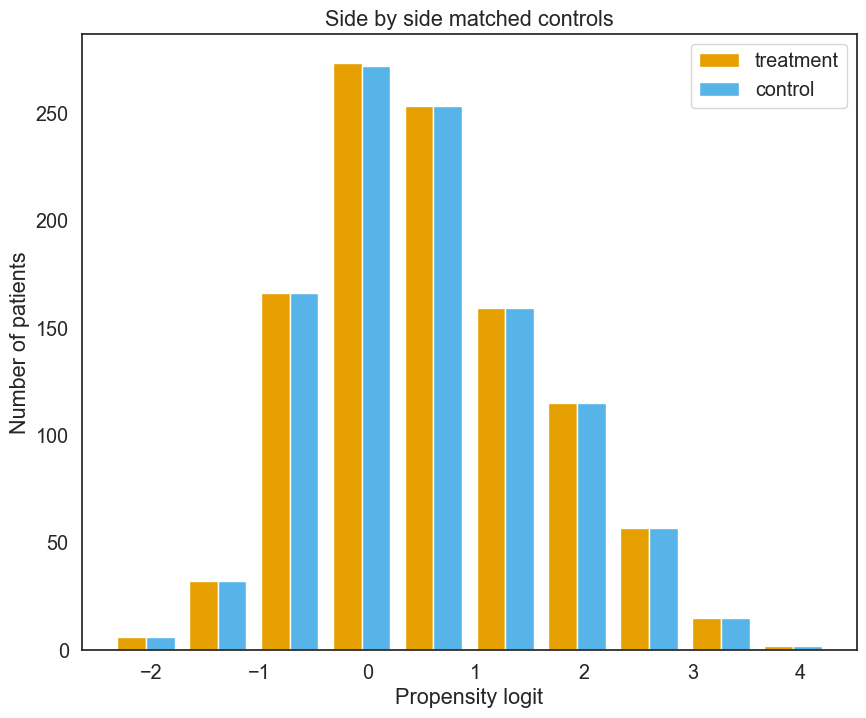

In [146]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

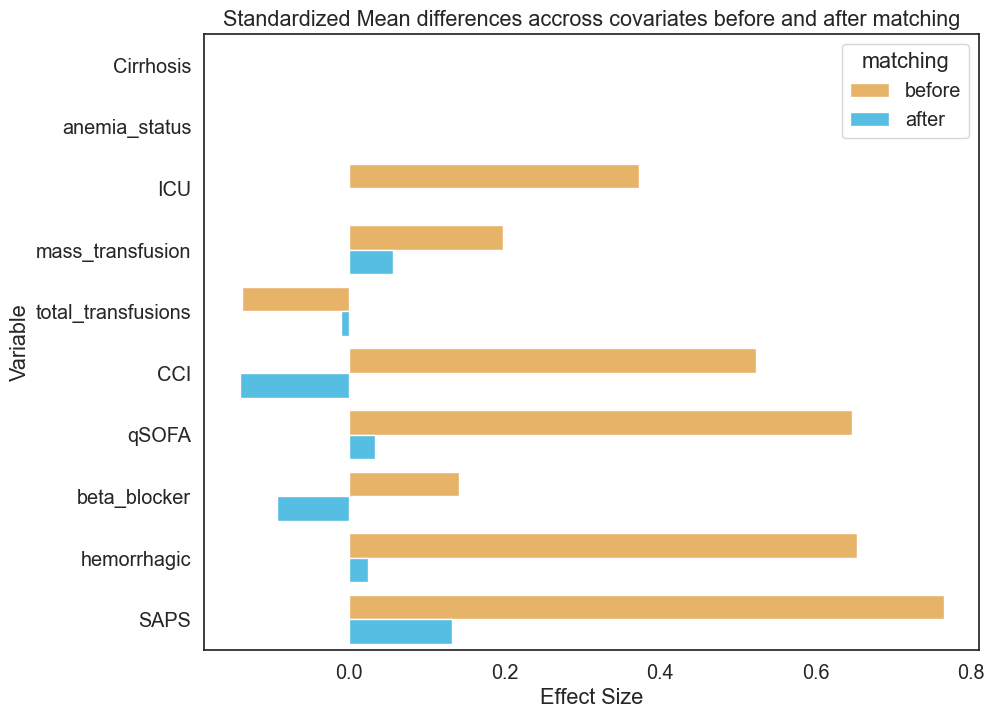

In [147]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [148]:
matched_df = psm.df_matched

In [149]:
matched_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  eef69bb8-c0a3-425d-b016-7df3a2903ed5          0            3.0    0   
1  33d6de89-6899-4fd5-887c-32f8dfe134a7          0            3.0    0   
2  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
3  96634105-8dd2-4024-84bd-864fe87f4843          0            3.0    0   
4  5f0dcf58-6c2c-45d5-a520-e2ffed4e1772          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  qSOFA  beta_blocker  \
0                 0                   1    6      0             1   
1                 0                   0    2      0             1   
2                 0                   1    4      1             0   
3                 0                   0    4      1             0   
4                 0                   0    3      1             0   

   hemorrhagic  SAPS  propensity_score  propensity_logit  albumin_24hrs  
0            0    29          0.506275          0.025102              1  
1            0    22          0.332645         -0.696247              1  
2            0    17          0.354129         -0.600937              1  
3            0    37          0.543346          0.173821              1  
4            0    23          0.399802         -0.406290              1

In [150]:
matched_df.shape

(2155, 14)

## Matched Ids

In [151]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  eef69bb8-c0a3-425d-b016-7df3a2903ed5  310709d4-9154-4989-99e4-80fac3ff5913
1  33d6de89-6899-4fd5-887c-32f8dfe134a7  a09a5a96-b710-4b64-adc2-e31c1035332d
2  b0f0d40d-6270-4c3e-a68e-ab460b6fc519  7b18476a-c39c-4508-867e-4cf5bf263608
3  96634105-8dd2-4024-84bd-864fe87f4843  de40532b-9b7a-4f36-aaad-8820978254c0
4  5f0dcf58-6c2c-45d5-a520-e2ffed4e1772  45f9f8c0-d422-4295-bb71-2a98eeeb8257

## Effect sizes per variables

In [152]:
psm.effect_size

Variable matching  Effect Size
0            Cirrhosis   before     0.000000
1            Cirrhosis    after     0.000000
2        anemia_status   before     0.000000
3        anemia_status    after     0.000000
4                  ICU   before     0.373387
5                  ICU    after     0.001451
6     mass_transfusion   before     0.198046
7     mass_transfusion    after     0.056077
8   total_transfusions   before    -0.136935
9   total_transfusions    after    -0.010063
10                 CCI   before     0.523816
11                 CCI    after    -0.140610
12               qSOFA   before     0.646160
13               qSOFA    after     0.032876
14        beta_blocker   before     0.141983
15        beta_blocker    after    -0.093163
16         hemorrhagic   before     0.653434
17         hemorrhagic    after     0.025048
18                SAPS   before     0.765236
19                SAPS    after     0.133105

## Explore Matched df

In [153]:
matched_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  eef69bb8-c0a3-425d-b016-7df3a2903ed5          0            3.0    0   
1  33d6de89-6899-4fd5-887c-32f8dfe134a7          0            3.0    0   
2  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
3  96634105-8dd2-4024-84bd-864fe87f4843          0            3.0    0   
4  5f0dcf58-6c2c-45d5-a520-e2ffed4e1772          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  qSOFA  beta_blocker  \
0                 0                   1    6      0             1   
1                 0                   0    2      0             1   
2                 0                   1    4      1             0   
3                 0                   0    4      1             0   
4                 0                   0    3      1             0   

   hemorrhagic  SAPS  propensity_score  propensity_logit  albumin_24hrs  
0            0    29          0.506275          0.025102              1  
1            0    22          0.332645         -0.696247              1  
2            0    17          0.354129         -0.600937              1  
3            0    37          0.543346          0.173821              1  
4            0    23          0.399802         -0.406290              1

In [154]:
matched_df.albumin_24hrs.value_counts()

1    1078
0    1077
Name: albumin_24hrs, dtype: int64

In [155]:
matched_df.shape

(2155, 14)

## Join Matched df with earlier df on encounterid to add outcome variables

In [156]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [157]:
f_df.shape

(2155, 16)

In [158]:
f_df.head()

encounterid  Cirrhosis  anemia_status  ICU  \
0  eef69bb8-c0a3-425d-b016-7df3a2903ed5          0            3.0    0   
1  33d6de89-6899-4fd5-887c-32f8dfe134a7          0            3.0    0   
2  b0f0d40d-6270-4c3e-a68e-ab460b6fc519          0            3.0    0   
3  96634105-8dd2-4024-84bd-864fe87f4843          0            3.0    0   
4  5f0dcf58-6c2c-45d5-a520-e2ffed4e1772          0            3.0    0   

   mass_transfusion  total_transfusions  CCI  qSOFA  beta_blocker  \
0                 0                   1    6      0             1   
1                 0                   0    2      0             1   
2                 0                   1    4      1             0   
3                 0                   0    4      1             0   
4                 0                   0    3      1             0   

   hemorrhagic  SAPS  propensity_score  propensity_logit  albumin_24hrs  \
0            0    29          0.506275          0.025102              1   
1            0    22          0.332645         -0.696247              1   
2            0    17          0.354129         -0.600937              1   
3            0    37          0.543346          0.173821              1   
4            0    23          0.399802         -0.406290              1   

                               personid  30_day_mortality  
0  01d02e7a-3cd1-47dd-9d5f-188e591a04df                 0  
1  511e7212-cb6a-4a04-9d88-7f9fc66014d8                 0  
2  561afc23-43fa-4108-8d23-01cd03d0001f                 0  
3  a79e9c99-a3c5-4c6a-8ee7-051cef1d4e5c                 0  
4  e266aa79-d8d7-4a54-9e68-90967ca83236                 0

In [159]:
df = f_df

In [160]:
am = df[df['albumin_24hrs'] == 1]['30_day_mortality'].value_counts()
print(am)

0    912
1    166
Name: 30_day_mortality, dtype: int64


In [161]:
mrate(am)

30 Day Mortality Rate (pct): 15.398886827458256


In [162]:
nam = df[df['albumin_24hrs'] == 0]['30_day_mortality'].value_counts()
print(nam)

0    970
1    107
Name: 30_day_mortality, dtype: int64


In [163]:
mrate(nam)

30 Day Mortality Rate (pct): 9.935004642525534


In [164]:
# f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/blood_diseases_matched_alb_24h_full.csv', index=False)